# Training MLP model on insurance claims data

In [5]:
!pip install numpy

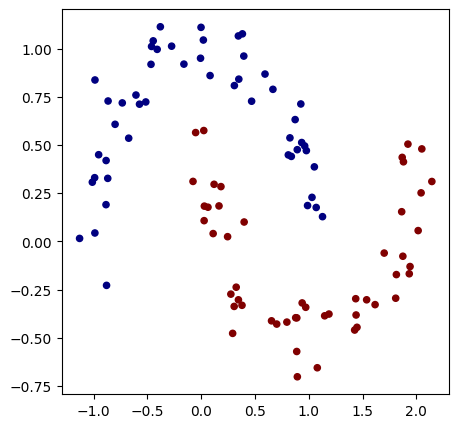

In [4]:
# !pip install scikit-learn

# make up a dataset
import matplotlib.pyplot as plt 
from sklearn.datasets import make_moons, make_blobs
X, y = make_moons(n_samples=100, noise=0.1)

y = y*2 - 1 # make y be -1 or 1
# visualize in 2D
plt.figure(figsize=(5,5))
plt.scatter(X[:,0], X[:,1], c=y, s=20, cmap='jet')

In [20]:
from dydx.layers import Linear, Loss
from dydx.model import Model
from dydx.dydx import Scalar
from dydx.linear_algebra import Array
from dydx.dataset import DataLoader, Dataset
import numpy as np 


l1 = Linear( random=True, dims=(8, 128))
l2 = Linear( random=True,dims=(128, 256))
l3 = Linear( random=True, dims=(256, 128))
l4 = Linear( random=True,dims=(128, 32))
l5 = Linear( activation=False, random=True, dims=(32,1)
) # when activation is set to false we use sigmoid function to normalised output 

		
names = ["l1","l2","l3","l4", "l5"]		
layers =[l1,l2,l3,l4, l5]
ls = dict(zip(names,layers))

model = Model(ls) 


def loss(batch_size=None):
    
    # inline DataLoader :)

    ri = np.random.permutation(X.shape[0])
    Xb, yb = X[ri], y[ri]
    print(list(Xb))
    yb = Array(yb)
    inputs = Array([list(map(Scalar, xrow)) for xrow in Xb])
    
    # forward the model to get scores
    scores = list(map(model, inputs))
    
    # svm "max-margin" loss
    losses = [(1 + -yi*scorei).relu() for yi, scorei in zip(yb, scores)]
    data_loss = sum(losses) * (1.0 / len(losses))
    # L2 regularization
    alpha = 1e-4
    reg_loss = alpha * sum((p*p for p in model.parameters()))
    total_loss = data_loss + reg_loss
    
    # also get accuracy
    accuracy = [(yi > 0) == (scorei.data > 0) for yi, scorei in zip(yb, scores)]
    return total_loss, sum(accuracy) / len(accuracy)

total_loss, acc = loss()
print(total_loss, acc)


for k in range(100):
    
    # forward
    total_loss, acc = loss()
    
    # backward
    model.zero_grad()
    total_loss.backward()
    
    # update (sgd)
    learning_rate = 1.0 - 0.9*k/100
    for p in model.parameters():
        p.data -= learning_rate * p.grad
    
    if k % 1 == 0:
        print(f"step {k} loss {total_loss.data}, accuracy {acc*100}%")



[array([0.30851462, 0.80804966]), array([2.05070608, 0.47957214]), array([0.02734576, 0.10751297]), array([ 0.97172424, -0.34173657]), array([-0.95294961,  0.44948685]), array([-0.40908974,  0.99582361]), array([0.18371197, 0.28407361]), array([-0.86534123,  0.72803084]), array([ 0.70211527, -0.4287471 ]), array([0.97752276, 0.47075945]), array([0.24545452, 0.02444312]), array([1.0299307 , 0.22837881]), array([1.86362073, 0.15385801]), array([-0.87957049, -0.22806601]), array([0.1198903 , 0.29611998]), array([0.34977859, 0.84135194]), array([-1.01174078,  0.30702611]), array([0.80981723, 0.44835995]), array([ 0.30666855, -0.33717429]), array([0.9341692 , 0.51271905]), array([-0.0014347 ,  1.10997605]), array([ 1.42645025, -0.45971355]), array([0.02942884, 0.18286062]), array([-0.46123053,  1.01085465]), array([-0.86845557,  0.32686498]), array([ 1.61636671, -0.32798086]), array([0.87330659, 0.63157705]), array([0.82490914, 0.53689367]), array([-0.6061693 ,  0.75891978]), array([0.02408

IndexError: invalid index to scalar variable.

In [ ]:
from dydx.layers import Linear, Loss
from dydx.model import Model
from dydx.dataset import DataLoader, Dataset


l1 = Linear( random=True, dims=(8, 128))
l2 = Linear( random=True,dims=(128, 256))
l3 = Linear( random=True, dims=(256, 128))
l4 = Linear( random=True,dims=(128, 32))
l5 = Linear( activation=False, random=True, dims=(32,1)
) # when activation is set to false we use sigmoid function to normalised output 

		
names = ["l1","l2","l3","l4", "l5"]		
layers =[l1,l2,l3,l4, l5]
ls = dict(zip(names,layers))

model = Model(ls) 
loss = Loss()
EPOCHS= 100

ds = Dataset(testing=True) # takes 160 examples to overfit model too for testing purposes
splits = ['train','val','test']
print(f"dataset sizes for {', '.join(splits)} are {[ds.__len__(split) for split in splits]} respectively.")
dst = ds.train
dsv = ds.val
dss = ds.test
# iterators 
dltrain  = DataLoader(dst,32)
dlval = DataLoader(dsv,32)
dltest = DataLoader(dss,23)


EARLY_STOPPING = None
losses = []
for epoch in range(EPOCHS):
	print("Training".center(70,"#"))
	for (idx,xy) in enumerate( dltrain()):
		x,y = xy 
		model = model.zero_grad()
		# print("After zero grad")
		# print(model.__dict__)

		y_hat =model(x) 
		
		acc, avg_loss = loss(y,y_hat)

		avg_loss.backward()

		losses.append(avg_loss.data)
		model = model.step()
		print(f'Epoch {epoch}:{idx} Loss:{avg_loss.data} train accuracy:{acc*100}%')
			
		# lr = 0.00000005 
		# for p in model.parameters():
		# 	#print('p.data:', p.data,  'p.grad:',p.grad)			
		# 	p.data = p.data -  lr * p.grad
        
		# model.zero_grad()

		# # checking if gradients were actually set to zero 
		# for p in model.parameters():
		# 	print('p.grad:',p.grad)

# 	print("Validation".center(70,"#"))
# 	for (idx,xy) in enumerate( dlval()):
# 		x,y = xy 
# #			for layer in model.layers:
# #				x = layer(x)
# 		y_hat = model(x)
# 		acc, avg_loss= loss(y,y_hat)
# 		print(f'Epoch {epoch}:{idx} Loss:{avg_loss.data} val accuracy:{acc*100}%')	

# train()

# layer init seed: 6158578929613097487
# dataset seed: 6320435684609269161


In [ ]:
names = ["l1","l2","l3","l4", "l5"]		
layers =[l1,l2,l3,l4, l5]
ls = dict(zip(names,layers))

model = Model(ls) 

model.__dict__


In [ ]:
!pip install ipympl

In [ ]:
%matplotlib widget
%matplotlib inline


In [ ]:
from dydx.dataset import DataLoader, Dataset
ds = Dataset(testing=True) # takes 160 examples to overfit model too for testing purposes
splits = ['train','val','test']
print(f"dataset sizes for {', '.join(splits)} are {[ds.__len__(split) for split in splits]} respectively.")
dst = ds.train
dsv = ds.val
dss = ds.test
# iterators 
dltrain  = DataLoader(dst,32)
dlval = DataLoader(dsv,32)
dltest = DataLoader(dss,23)


import torch.nn as nn
from torch.optim import SGD
import torch.nn.functional as F
from torch import Tensor


# PyTorch models inherit from torch.nn.Module
class ClaimsClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(8, 128)
        self.fc2 = nn.Linear(128, 256)
        self.fc3 = nn.Linear(256, 128)
        self.fc4 = nn.Linear(128, 32)
        self.fc5 = nn.Linear(32,1)
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.relu(self.fc3(x))
        x = F.relu(self.fc4(x))
        x = self.fc5(x)
        return F.sigmoid(x)
    

model = ClaimsClassifier()

for _ in range(100000):
    optimizer = SGD(model.parameters(), lr=0.001, momentum=0.9)
    for xy in dltrain():
        x, y = xy
        x = Tensor([[x_.data for x_ in row] for row in x.values])
        y = Tensor([y_.data for y_ in y.values])
        
        #print(Tensor(x))
        #print(Tensor(y))

        optimizer.zero_grad()
        y_hat = model(x)
        y_hat = y_hat.squeeze(1)
        #print(y_hat.shape)
        #print(y_hat)
        loss= F.binary_cross_entropy(y_hat,y)
        loss.backward()
        optimizer.step()
        print(loss)



    


